In [1]:
import numpy as np
import pandas
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [2]:
#masukin data1
data1=pandas.read_csv('D:\\SKRIPSI\\data\\data_praproses\\jamu_herbs.csv', sep=',')
#masukin data2
data2=pandas.read_csv('D:\\SKRIPSI\\data\\data_praproses\\jamu_class.csv', sep=',')
data_1 = data1.drop('IDJamu',axis=1)
data_2 = data2.drop('Jamu ID',axis=1)
data_1['Kelas']=data_2['Class of Diseases']
X = data_1.drop('Kelas', axis=1).values
y = data_1['Kelas'].values

In [11]:
kf = StratifiedKFold(n_splits=4, random_state=None, shuffle=False)
val_loss_cv = []
val_acc_cv = []
j = 0
for train_index, test_index in kf.split(X,y)
    j+=1
    print(f"Fold {j} :")
    print("")
    ros = RandomOverSampler()
    X_ros = ros.fit_sample(X)
    X_ros_train,X_test = X_ros[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    model = Sequential()
    model.add(Dense(input_dim=X_ros_train.shape[1], units=128,
                     kernel_initializer='normal', bias_initializer='zeros'))
    model.add(Activation('relu'))

    for i in range(0, 6):
        model.add(Dense(units=128, kernel_initializer='normal',
                         bias_initializer='zeros'))
        model.add(Activation('relu'))
        model.add(Dropout(.15))

    model.add(Dense(units=19))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_ros_train, y_train,batch_size=24,epochs=30,verbose=1,validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=1)
    val_loss_cv.append(score[0])
    val_acc_cv.append(score[1])

SyntaxError: invalid syntax (<ipython-input-11-0320f152b624>, line 5)

In [6]:
print(f"val_loss_cv : {val_loss_cv}")
print(f"mean_val_loss_cv : {np.mean(val_loss_cv)}")
print(f"val_acc_cv : {val_acc_cv}")
print(f"mean_val_acc_cv : {np.mean(val_acc_cv)}")

val_loss_cv : [3.0265016480693667, 2.701828105380111, 3.229176915486654, 3.1206128205731014]
mean_val_loss_cv : 3.0195298723773085
val_acc_cv : [0.5118110240913751, 0.5318302389639442, 0.5493333333333333, 0.5794392524558171]
mean_val_acc_cv : 0.5431034622111174


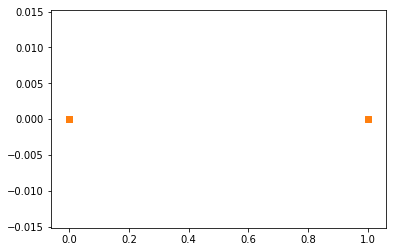

In [32]:
from matplotlib import pyplot as plt

def plot_2d_space(X, y, label='Kelas'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')